# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Importing data

In [2]:
path=r"C:\Users\chenh\z_Careerfoundry\Achievements 6"

In [3]:
df=pd.read_csv(os.path.join(path,'kc_house_clean.csv'))

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long'],
      dtype='object')

# Pick out variables 

In [4]:
# Create a subset excluding the "id" ,"date" ,'zipcode','lat' and 'long' columns
sub=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'price']]

In [7]:
sub.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,510000.0


In [8]:
sub.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
price            float64
dtype: object

# Correlation

## Extreme values checks

In [10]:
sub[sub['bedrooms'] >30]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,price
15870,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,640000.0


In [11]:
# Clean extreme values

sub = sub[sub['bedrooms'] < 30] 

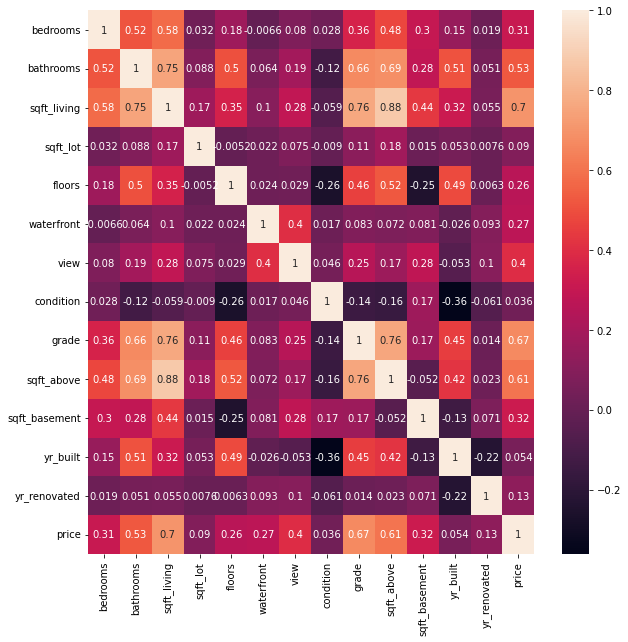

In [5]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

According to the Correlation Matrices, we examine the relationship between the dependent variable, prices, and other independent variables. When the value is greater than 0.5, the correlation is strong. The variables with values greater than 0.5 include bathrooms, sqft_living, and grade, with the highest value being 0.7, and the variable is sqft_living.

# Scatterplot 

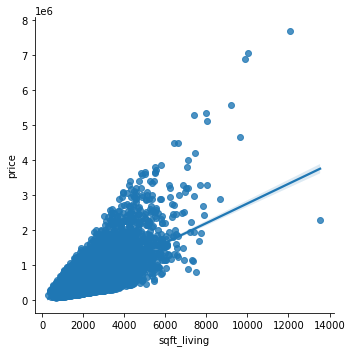

In [7]:
sns.lmplot(x = 'sqft_living', y = 'price', data = sub)

From the scatter plot, it can be seen that price and sqft_living have a strong positive correlation. The scatter plot forms a triangular shape, indicating that as sqft_living increases, the dispersion of price also increases.

# Pair Plots

In [16]:
sub1=sub[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','price']]

In [17]:
sub2=sub[['floors', 'waterfront', 'view', 'condition','grade', 'yr_built', 'yr_renovated', 'price']]

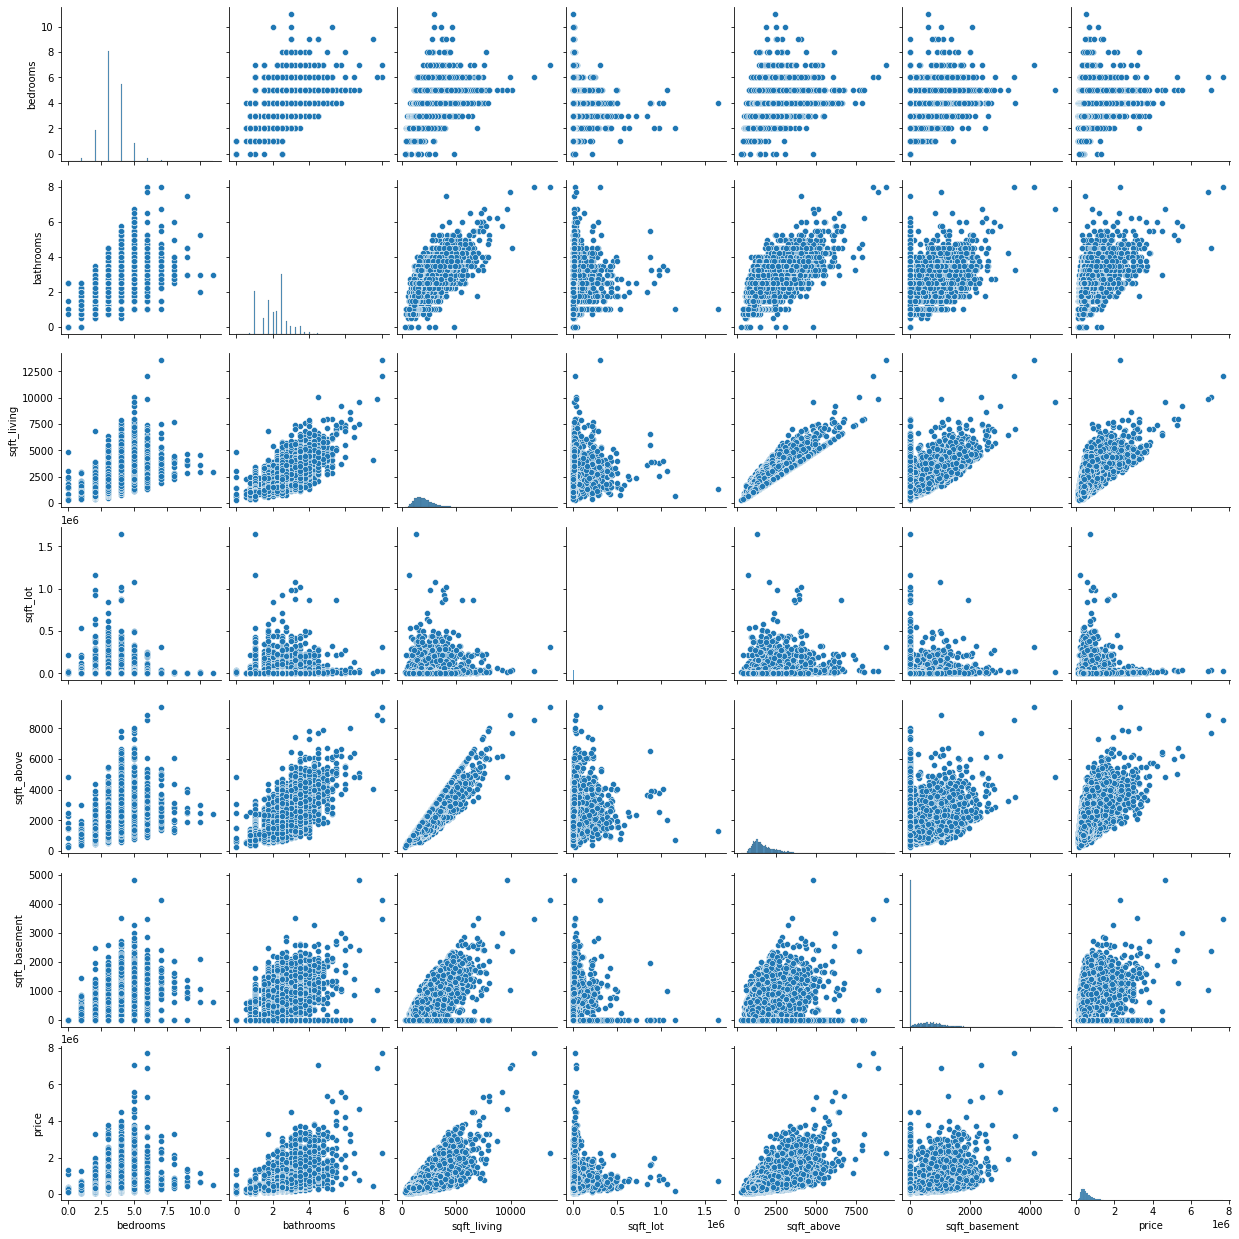

In [18]:
sns.pairplot(sub1)

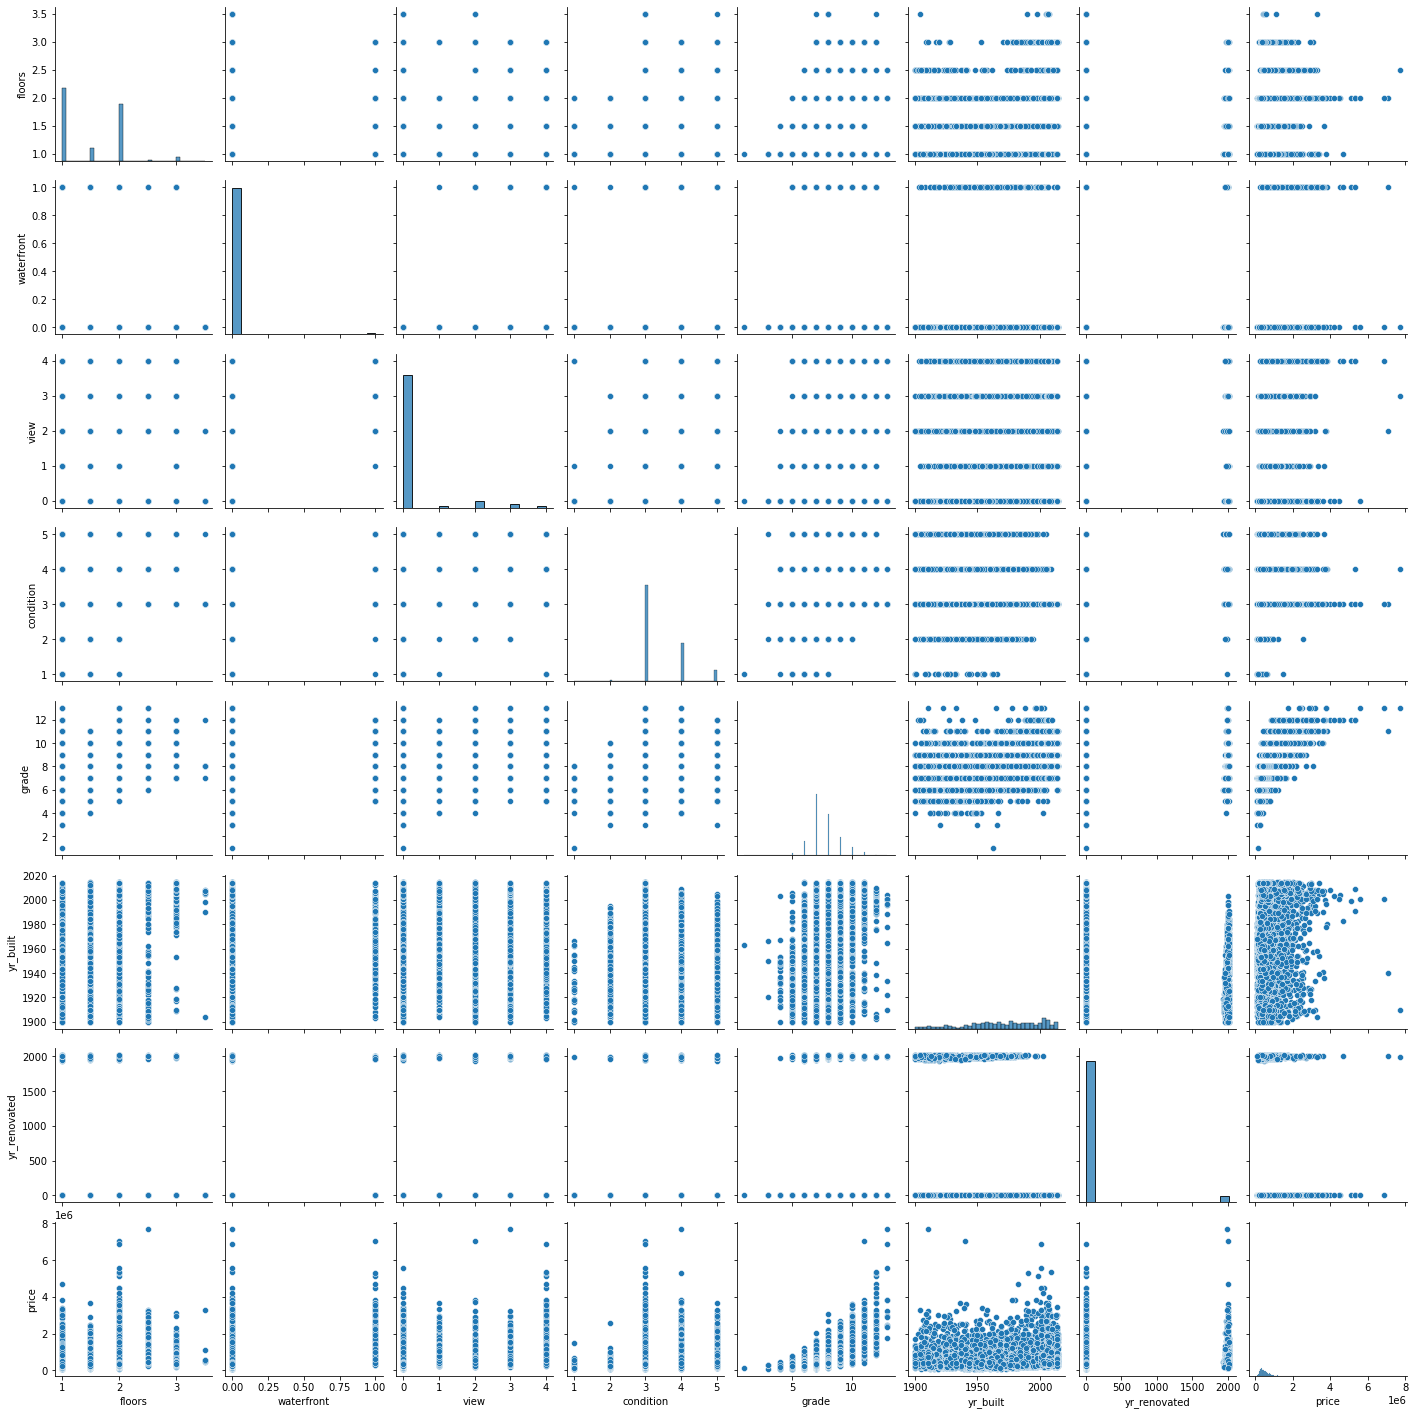

In [37]:
sns.pairplot(sub2)

The distribution of variables 'floors' and 'yr_built' is relatively dispersed, while the distribution of other variables is relatively concentrated.

The variables to be explored further are grade, bathrooms, and sqft_living, because from the scatter plot, these variables show a strong correlation with price.

# Categorical Plots

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

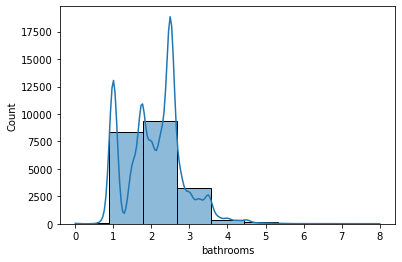

In [19]:
sns.histplot(sub['bathrooms'], bins = 9, kde = True)

In [20]:
print(sub['bathrooms'].describe())

count    21612.000000
mean         2.114774
std          0.770177
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


In [21]:
sub.loc[sub['bathrooms'] < 2, 'bath_num'] = 'small num'

In [22]:
sub.loc[(sub['bathrooms'] >= 2) & (sub['bathrooms'] < 3), 'bath_num'] = 'middle num'

In [23]:
sub.loc[sub['bathrooms'] >=3 , 'bath_num'] = 'large num'

In [24]:
sub['bath_num'].value_counts()

middle num    10542
small num      8440
large num      2630
Name: bath_num, dtype: int64

In [20]:
sub.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,price,bath_num
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,221900.0,small num
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,538000.0,middle num
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,180000.0,small num
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,604000.0,large num
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,510000.0,middle num


In [22]:
sub.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
price            float64
bath_num          object
dtype: object

In [9]:
print(sub[['sqft_living', 'price', 'bath_num']].isnull().sum())

sqft_living    0
price          0
bath_num       0
dtype: int64


KeyboardInterrupt: 

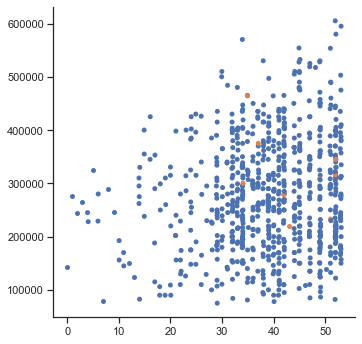

In [25]:
sns.set(style="ticks")
sns.catplot(x="sqft_living", y="price", hue="bath_num",data=sub)

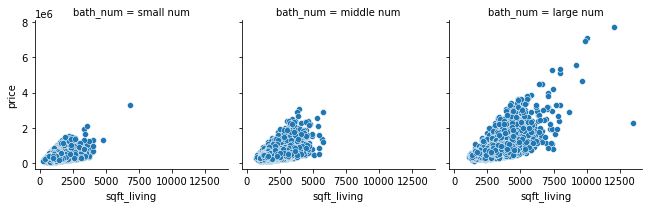

In [11]:
g = sns.FacetGrid(sub, col="bath_num", col_wrap=4)
g.map(sns.scatterplot, "sqft_living", "price")
plt.show()

Based on observations, when the number of bathrooms is fewer, the scatter plot of S and P becomes more tightly clustered, indicating a stronger correlation between them.

#  Revisit the questions

## How do the number of bedrooms and bathrooms affect housing prices?

The relationship between the number of bedrooms and the price of the house is unknown, and the number of bathrooms is positively correlated with the price.  

## How does the SQFT of the house affect housing prices?

SQFT-living is the most representative, and it is strongly positively correlated with housing prices.

## How does the view of the house affect housing prices?

The correlation coefficient between view and housing prices is 0.4, indicating a positive correlation

## How does the condition and grades of the house affect housing prices? 

The relationship between the condition and the price of the house is unknown, and the grades is positively correlated with the price.

## How does the age of the house affect housing prices?`

The relationship between the age and the price of the house is unknown.

## New Question

Is the number of bathrooms linearly correlated with housing prices?  

Is the SQFT_living linearly correlated with housing prices?  

What is the difference in the correlation coefficient between SQFT_living and house prices for houses of different grades?

# Hypotheses

IF the higher the number of bathrooms in the house, then the higher the price of the house.

IF the larger the living area of the house, then the higher the price of the house.

If the higher the grade of the home, then the higher the price.